In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from pymatgen.util.plotting_utils import get_publication_quality_plot
from pyqe.qe_output import *

mpl.rcParams['axes.linewidth']=3
mpl.rcParams['lines.markeredgewidth']=3
mpl.rcParams['lines.linewidth']=2
mpl.rcParams['lines.markersize']=5
mpl.rcParams['xtick.major.width']=3
mpl.rcParams['xtick.major.size']=8
mpl.rcParams['xtick.minor.width']=3
mpl.rcParams['xtick.minor.size']=4
mpl.rcParams['ytick.major.width']=3
mpl.rcParams['ytick.major.size']=8
mpl.rcParams['ytick.minor.width']=3
mpl.rcParams['ytick.minor.size']=4

3.9631788


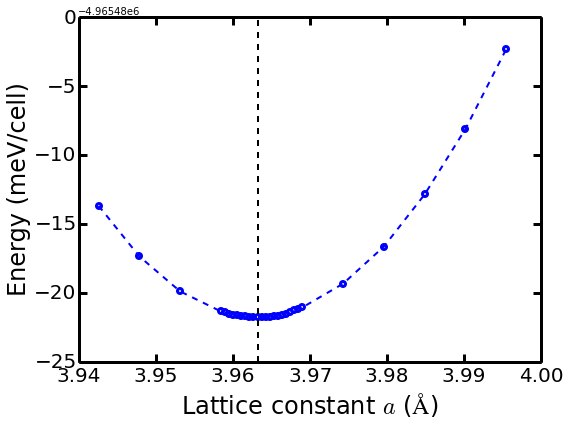

In [2]:
plt1 = get_ea_plot('pto_latt.csv')
plt1.ylabel('Energy (meV/cell)')
plt1.tight_layout()
plt1.savefig('pto_latt.pdf')

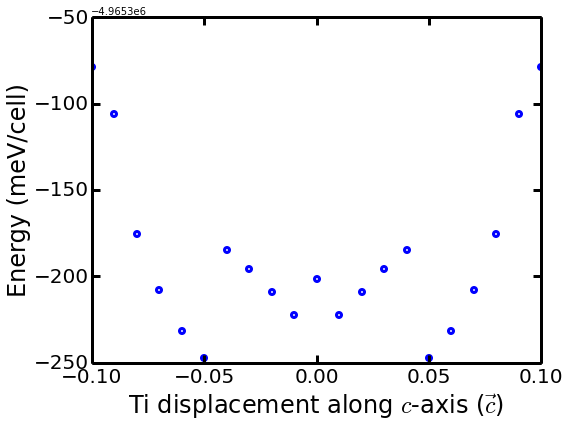

In [3]:
b2 = BasicAnalyzer('pto_disp.csv')
df2 = b2.df
c = [float(f.split('_')[-1]) for f in b2['filename']]
df2['c'] = c
ndf2 = df2.sort(columns='c')
plt2 = get_publication_quality_plot(8,6)
plt2.plot(ndf2['c']-0.5,ndf2['energy'],'bo',fillstyle='none')
plt2.ylabel('Energy (meV/cell)')
plt2.xlabel('Ti displacement along $c$-axis ($\\vec{c}$)')
plt2.tight_layout()
plt2.savefig('pto_disp.pdf')

In [4]:
e1 = df2[df2.c==0.5]['energy'].real[0]
e2 = b2.emin_config['energy']
print e1 - e2

45.7059001243


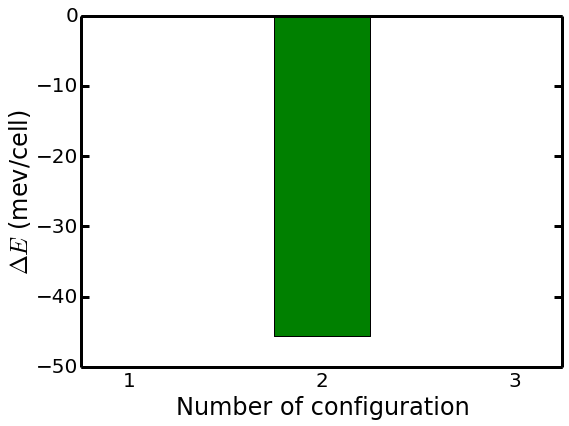

In [5]:
b3 = BasicAnalyzer('pto_relax.csv')
e3 = b3['energy'][0]
ed = np.array([e1,e2,e3])-e1+0.1
index = np.arange(1,4)
mpl.rcParams['xtick.major.size']=0
plt3 = get_publication_quality_plot(8,6)
plt3.bar(index,ed,0.5,color='g')
plt3.plot([1,3.5],[0,0],'k-')
plt3.ylim(ymax=0)
plt3.xticks(index+0.25,range(1,4))
plt3.ylabel('$\Delta E$ (mev/cell)')
plt3.xlabel('Number of configuration')
plt3.tight_layout()
plt3.savefig('pto_ed.pdf')